***This is a Practice Notebook for 06/09/2021, what I do here:*** 
<hr>
# Latest Covid-19 India Statewise Data
**Covid-19 India Statewise Data as on September 01, 2021**
<a href="https://www.kaggle.com/anandhuh/latest-covid19-india-statewise-data">Kaggle Page</a>
<hr>

### About
This dataset contains latest Covid-19 India state-wise data as on September 01, 2021. This dataset can be used to analyze covid condition in India.
This dataset is great for Exploratory Data Analysis

### Attribute Information
- State/UTs - Names of Indian States and Union Territories.
- Total Cases - Total number of confirmed cases
- Active - Total number of active cases
- Discharged - Total number of discharged cases
- Deaths - Total number of deaths
- Active Ratio (%) - Ratio of number of active cases to total cases
- Discharge Ratio (%) - Ratio of number of discharged cases to total cases
- Death Ratio (%) - Ratio of number of deaths to total cases

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset
df_imported = pd.read_csv('./datasets/Latest Covid-19 India Status.csv')

In [7]:
df_imported.sort_values(by=['Total Cases'], ascending=False)

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
20,Maharashtra,6464876,54763,6272800,137313,0.85,97.03,2.12
16,Kerala,4057233,219441,3817004,20788,5.41,94.08,0.51
15,Karnataka,2949445,18412,2893715,37318,0.62,98.11,1.27
30,Tamil Nadu,2614872,16850,2563101,34921,0.64,98.02,1.34
1,Andhra Pradesh,2014116,14693,1985566,13857,0.73,98.58,0.69
33,Uttar Pradesh,1709335,256,1686256,22823,0.01,98.65,1.34
35,West Bengal,1548604,8815,1521342,18447,0.57,98.24,1.19
8,Delhi,1437764,349,1412333,25082,0.02,98.23,1.74
25,Odisha,1007750,6546,993235,7969,0.65,98.56,0.79
6,Chhattisgarh,1004451,412,990484,13555,0.04,98.61,1.35


## Data First Check
- Our data must meet some criteria:
    - The sum of `Active`, `Discharged` and `Deaths` must equals to `Total Cases`.
    - The sum of `Active Ratio`, `Discharge Ratio` and `Death Ratio` must be 100.

In [24]:
df = df_imported.copy()

In [25]:
# Check first Criterion - The total Cases
df.loc[df['Total Cases'] - df['Active'] - df['Discharged'] - df['Deaths'] != 0]

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)


In [26]:
# Check the second criterion - The sum of Ratio
df.loc[df['Active Ratio (%)'] + df['Discharge Ratio (%)'] + df['Death Ratio (%)'] != 100.00]

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
2,Arunachal Pradesh,53031,863,51908,260,1.63,97.88,0.49
7,Dadra and Nagar Haveli and Daman and Diu,10663,4,10655,4,0.04,99.92,0.04
8,Delhi,1437764,349,1412333,25082,0.02,98.23,1.74
13,Jammu and Kashmir,325419,1330,319681,4408,0.41,98.24,1.35
14,Jharkhand,347867,130,342605,5132,0.04,98.49,1.48
17,Ladakh,20560,69,20284,207,0.34,98.66,1.01
18,Lakshadweep,10347,31,10265,51,0.30,99.21,0.49
21,Manipur,113933,3397,108754,1782,2.98,95.45,1.56
25,Odisha,1007750,6546,993235,7969,0.65,98.56,0.79
26,Puducherry,123572,715,121045,1812,0.58,97.96,1.47


In [31]:
# Convert the result to List since list show the decimal part more accurately
list(df['Active Ratio (%)'] + df['Discharge Ratio (%)'] + df['Death Ratio (%)'])

[100.0,
 100.0,
 99.99999999999999,
 100.0,
 100.0,
 100.0,
 100.0,
 100.00000000000001,
 99.99,
 100.0,
 100.0,
 100.0,
 100.0,
 99.99999999999999,
 100.01,
 100.0,
 100.0,
 100.01,
 99.99999999999999,
 100.0,
 100.0,
 99.99000000000001,
 100.0,
 100.0,
 100.0,
 100.00000000000001,
 100.00999999999999,
 99.99999999999999,
 100.0,
 99.99999999999999,
 100.0,
 100.0,
 100.0,
 100.00000000000001,
 99.99,
 99.99999999999999]

**Some thoughts:**
   - My assumption about Ratio is quite naive, since I forgot these numbers have to be rounded here.
   - And after checking, they are all approximately equal to 100, so they meet the criterion.
   - The dataset is well organized so I don't think I have to check anything else, it's time for ***Visualization***.

## Visualization

In [64]:
# The default index has no meaning here, for visualization, we set State/UTs to be our index
df.set_index('State/UTs', inplace=True) 

### Plot the number of cases in top5 `Total Cases`

But first, let's plot them all

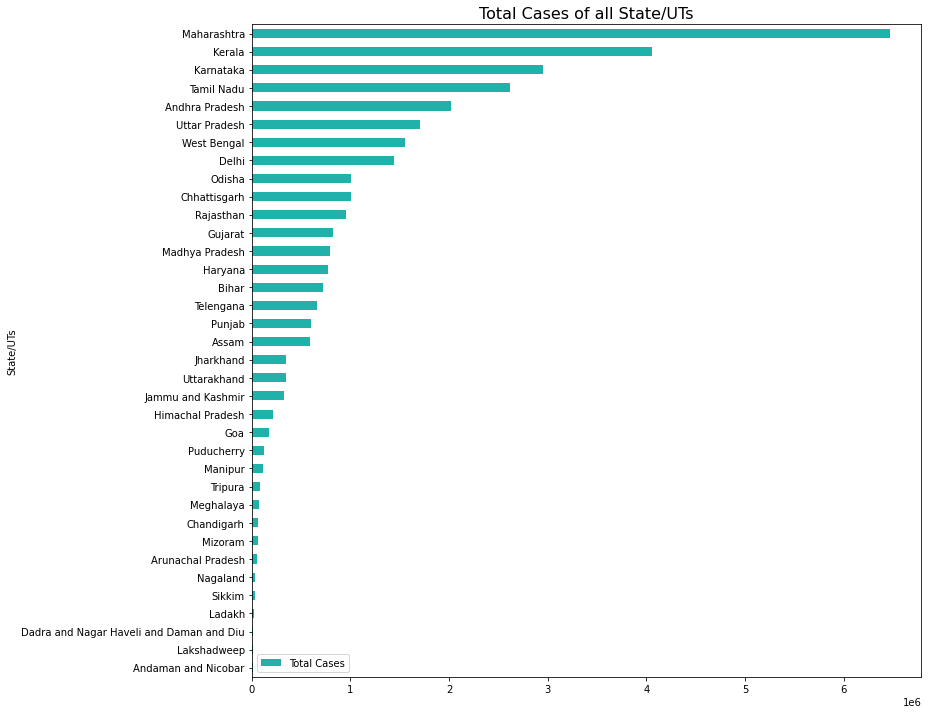

In [66]:
df_total = df.sort_values(by=['Total Cases'], ascending=True)[['Total Cases']]

df_total.plot(kind='barh', color='lightseagreen', figsize=(12, 12))

plt.title('Total Cases of all State/UTs', fontsize=16)
plt.show()

It's hard to see, really hard, so just plot Top5 now

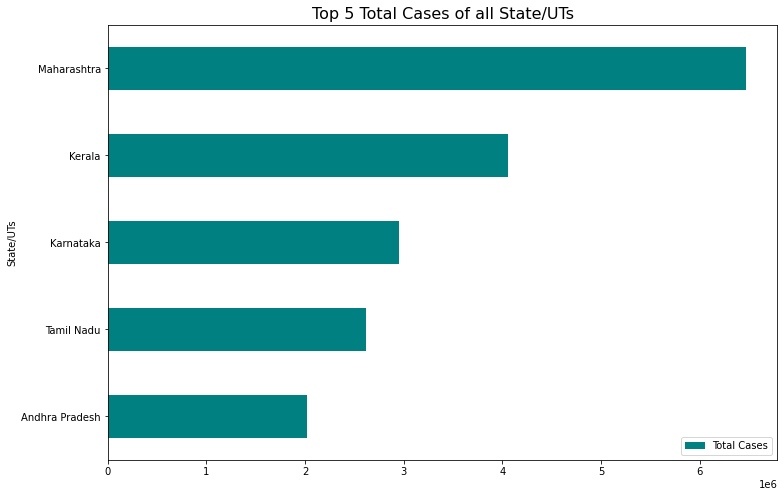

In [80]:
df_top5_total = df.sort_values(by=['Total Cases'], ascending=True).tail(5)[['Total Cases']]

df_top5_total.plot(kind='barh', 
                   color='Teal',
                   figsize=(12, 8))

plt.title('Top 5 Total Cases of all State/UTs', fontsize=16)
plt.show()

It's now clean, beautiful and impact. Let's move on.

- Our `Active Ratio`, `Discharge Ratio` and `Death Ratio` sum up to 100 (approximately), so using **Area Plot** here is good.

### Plot Active, Discharge and Death Ratio with Area Plot

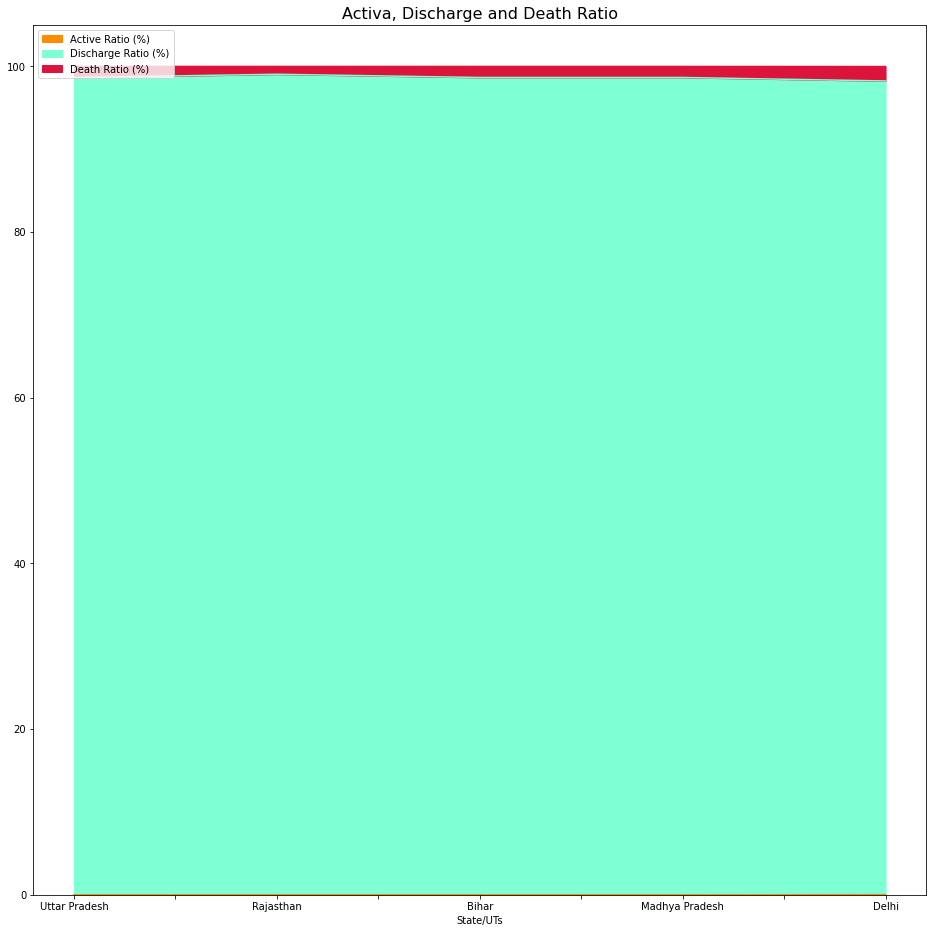

In [78]:
df_ratio = df[['Active Ratio (%)', 'Discharge Ratio (%)', 'Death Ratio (%)']]

# Take Top 5 Active Cases
df_ratio = df_ratio.sort_values(by=['Active Ratio (%)']).head(5)

df_ratio.plot(kind='area', 
              color=['darkorange', 'aquamarine', 'crimson'],
              figsize=(16, 16))

plt.title('Activa, Discharge and Death Ratio', fontsize=16)
plt.legend(loc='upper left')
plt.show()

**Some Thoughts**:
- Area Plot is good for Ratio Data technically, but since our `Discharge Ratio` is way to high compares to others, we can't see anything here :(
- Even Pie Chart will have the same problem.
- Seem like I don't have any more visualization idea for this dataset, I will stop here.
- But before that, let's try improve previous Top 5 Bar Chart.

### A little bit of Visualization improvement 

<Figure size 864x576 with 0 Axes>

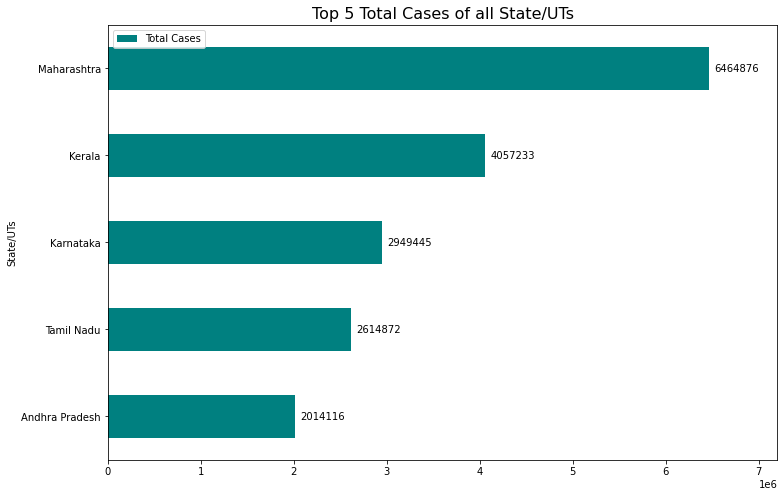

In [90]:
df_top5_total = df.sort_values(by=['Total Cases'], ascending=True).tail(5)[['Total Cases']]

plt.figure(figsize=(12, 8))
ax = df_top5_total.plot(kind='barh', 
                        color='Teal',
                        figsize=(12, 8))

ax.set_title('Top 5 Total Cases of all State/UTs', fontsize=16)
ax.legend(loc='upper left')
ax.set_xlim(0, 7200000)

# Add Number of Cases at the end of each Bar
label = df_top5_total['Total Cases']

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with no decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.


plt.show()

**Some Thoughts:**
   - Just some little adjustments (Change the Legend Location, add bar label) make the code way more complicated.
   - The annotation is powerful, I have to learn this some days. (This version I took from <a href=https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart>StackOverflow</a>)